# 병충해 분석 AI 프로젝트

## 1. 파일읽기

In [1]:
import numpy as np
import pandas as pd
import os

# 작업경로 설정

#-----------기본경로
base_dir = 'data/'

# 기본경로+폴더명 작성  (폴더명을 os.listdir 로 가져와서 작업해도 됨)
train_imgs = os.path.join(base_dir,'img/Training')
test_imgs = os.path.join(base_dir,'img/Validation')

train_csv = pd.read_csv('data/train_label.csv')
val_csv = pd.read_csv('data/validation_label.csv')

print('end')

end


In [3]:
train_imgs

'data/img/Training'

In [4]:
print(len(train_csv))

train_csv.head(2)

133636


,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,2020/11/02,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,2020/11/02,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상


In [5]:
print(len(val_csv))
val_csv.head(2)

16701


,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,2020/11/03,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,2020/11/03,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':...",고추_0.정상


In [2]:
train_imgs_list = os.listdir(train_imgs)
test_imgs_list = os.listdir(test_imgs)

In [3]:
train_imgs_list

['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병']

In [4]:
test_imgs_list

['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병']

In [5]:
train_imgs_list = ['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병']

In [6]:
test_imgs_list = ['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병']

In [ ]:
train_imgs_fnames = []

for img in train_imgs_list[:2]:
    
    tmp = []
    tmp = os.listdir(f'{train_imgs}/{img}')
    # 이미지수 1000장 제한
    tmp = tmp[:1000]
    print(img, len(tmp))
    train_imgs_fnames.extend(tmp)

len(train_imgs_fnames)


[원천]고추_0.정상 1000
[원천]고추_1.질병 1000


2000

In [ ]:
test_imgs_fnames = []

for img in test_imgs_list[:2]:
    tmp = []
    tmp = os.listdir(f'{test_imgs}/{img}')
    # 이미지수 1000장 제한
    tmp = tmp[:1000]
    print(img, len(tmp))
    test_imgs_fnames.extend(tmp)

len(test_imgs_fnames)

[원천]고추_0.정상 1000
[원천]고추_1.질병 229


1229

In [ ]:
print('훈련이미지 갯수:',  len(train_imgs_fnames))
print('테스트이미지 갯수:', len(test_imgs_fnames))

훈련이미지 갯수: 2000
테스트이미지 갯수: 1229


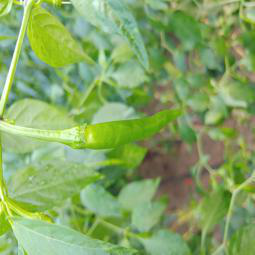

In [ ]:
 #샘플 사진 확인
sample = f'{train_imgs}/{train_imgs_list[0]}/{train_imgs_fnames[0]}'
from PIL import Image
sample_img = Image.open(sample)
sample_img = sample_img.resize((255,255))
sample_img

## csv 필요한 정보로 축약 테스트 (고추)

In [7]:
train_pepper_0 = train_csv[:8575]
train_pepper_0 = train_pepper_0[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
train_pepper_0.tail(2)

,image,disease,crop,grow,risk,points,name
8573,V006_79_0_00_01_05_13_0_c32_20201130_0114_S01_...,0,1,13,0,"[{'xtl': 0, 'ytl': 0, 'xbr': 2782, 'ybr': 3024}]",고추_0.정상
8574,V006_79_0_00_01_05_13_0_c32_20201130_0115_S01_...,0,1,13,0,"[{'xtl': 0, 'ytl': 0, 'xbr': 2536, 'ybr': 1988}]",고추_0.정상


In [8]:
train_pepper_1 = train_csv[8575:10463]
train_pepper_1 = train_pepper_1[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
train_pepper_1.tail(2)

,image,disease,crop,grow,risk,points,name
10461,V006_79_1_02_01_03_13_3_9315z_20201126_7.JPG,2,1,13,3,"[{'xtl': 406, 'ytl': 452, 'xbr': 5140, 'ybr': ...",고추_1.질병
10462,V006_79_1_02_01_03_13_3_9315z_20201126_9.JPG,2,1,13,3,"[{'xtl': 0, 'ytl': 295, 'xbr': 3634, 'ybr': 26...",고추_1.질병


In [9]:
val_pepper_0 = val_csv[:1110]
val_pepper_0 = val_pepper_0[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
val_pepper_0.tail(2)

,image,disease,crop,grow,risk,points,name
1108,V006_79_0_00_01_05_13_0_c32_20201130_0098_S01_...,0,1,13,0,"[{'xtl': 148, 'ytl': 0, 'xbr': 3024, 'ybr': 25...",고추_0.정상
1109,V006_79_0_00_01_05_13_0_c32_20201130_0101_S01_...,0,1,13,0,"[{'xtl': 0, 'ytl': 590, 'xbr': 3024, 'ybr': 39...",고추_0.정상


In [10]:
val_pepper_1 = val_csv[1110:1339]
val_pepper_1 = val_pepper_1[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
val_pepper_1.head(2)

,image,disease,crop,grow,risk,points,name
1110,V006_79_1_01_01_01_13_1_0424z_20200929_6.JPG,1,1,13,1,"[{'xtl': 2370, 'ytl': 1314, 'xbr': 4765, 'ybr'...",고추_1.질병
1111,V006_79_1_01_01_01_13_1_0424z_20201023_11.JPG,1,1,13,1,"[{'xtl': 2890, 'ytl': 308, 'xbr': 3820, 'ybr':...",고추_1.질병


## 각 질병별 샘플 수 조절

In [11]:
train_pepper_0['disease'].value_counts()

0    8575
Name: disease, dtype: int64

In [12]:
train_pepper_1['disease'].value_counts()

1    973
2    915
Name: disease, dtype: int64

In [13]:
t01 = train_pepper_0[:1000]

In [14]:
t02 = train_pepper_1[train_pepper_1['disease'] == 1][:500]

In [15]:
t03 = train_pepper_1[train_pepper_1['disease'] == 2][:500]

In [16]:
train_pepper_zip = pd.concat([t01, t02, t03])

In [17]:
train_pepper_zip

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
10043,V006_79_1_02_01_03_13_2_5430z_20201029_11.jpg,2,1,13,2,"[{'xtl': 592, 'ytl': 716, 'xbr': 3001, 'ybr': ...",고추_1.질병
10044,V006_79_1_02_01_03_13_2_5430z_20201029_13.jpg,2,1,13,2,"[{'xtl': 27, 'ytl': 683, 'xbr': 2822, 'ybr': 1...",고추_1.질병
10045,V006_79_1_02_01_03_13_2_5430z_20201029_18.jpg,2,1,13,2,"[{'xtl': 1175, 'ytl': 718, 'xbr': 3001, 'ybr':...",고추_1.질병
10046,V006_79_1_02_01_03_13_2_5430z_20201029_5.jpg,2,1,13,2,"[{'xtl': 507, 'ytl': 532, 'xbr': 3522, 'ybr': ...",고추_1.질병


In [22]:
print(train_pepper_0['disease'].unique())
print(train_pepper_1['disease'].unique())
print(val_pepper_0['disease'].unique())
print(val_pepper_1['disease'].unique())


[0]
[1 2]
[0]
[1 2]


# for문으로 각 작물당 2000개씩 샘플 묶기
- 1 고추
- 2 토마토
- 3 오이
- 4 양배추
- 5 배추
- 6 애호박 삭제
- 7 콩
- 8 무
- 9 파
- 10 호박 삭제

> 총 8개의 작물 (곤충과 겹치는 작물)


In [18]:
tc = train_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
tc

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
133631,V006_79_1_20_10_03_13_3_4912b_20201126_247.jpg,20,10,13,3,"[{'xtl': 45, 'ytl': 84, 'xbr': 1410, 'ybr': 12...",호박_1.질병
133632,V006_79_1_20_10_03_13_3_4912b_20201127_248.jpg,20,10,13,3,"[{'xtl': 201, 'ytl': 43, 'xbr': 1378, 'ybr': 1...",호박_1.질병
133633,V006_79_1_20_10_03_13_3_7419e_20201026_4.jpeg,20,10,13,3,"[{'xtl': 497, 'ytl': 905, 'xbr': 2441, 'ybr': ...",호박_1.질병
133634,V006_79_1_20_10_03_13_3_7419e_20201027_1.jpeg,20,10,13,3,"[{'xtl': 517, 'ytl': 1161, 'xbr': 2419, 'ybr':...",호박_1.질병


In [46]:
tc = train_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
df = pd.DataFrame(index=range(0,), columns=['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name'])

for i in [1,2,3,5,6,7,8,9]:
    for k in range(19):
        if k == 0:
            tmp = tc[(tc['crop'] == i)&(tc['disease'] == k)][:1000]
            df = pd.concat([df, tmp])
        else:
            tmp = tc[(tc['crop'] == i)&(tc['disease'] == k)][:500]
            df = pd.concat([df, tmp])


train_df = df

In [47]:
train_df

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
122242,V006_79_1_18_09_03_13_1_0819e_20201117_133.jpg,18,9,13,1,"[{'xtl': 135, 'ytl': 0, 'xbr': 875, 'ybr': 961}]",파_1.질병
122243,V006_79_1_18_09_03_13_1_0819e_20201117_134.jpg,18,9,13,1,"[{'xtl': 293, 'ytl': 0, 'xbr': 520, 'ybr': 961}]",파_1.질병
122244,V006_79_1_18_09_03_13_1_0819e_20201118_137.jpg,18,9,13,1,"[{'xtl': 2, 'ytl': 0, 'xbr': 722, 'ybr': 878}]",파_1.질병
122245,V006_79_1_18_09_03_13_1_0819e_20201118_139.jpg,18,9,13,1,"[{'xtl': 192, 'ytl': 0, 'xbr': 636, 'ybr': 961}]",파_1.질병


In [21]:
vc = val_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
vc

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,0,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,0,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a05_20201111_0009_S01_...,0,1,13,0,"[{'xtl': 697, 'ytl': 967, 'xbr': 3797, 'ybr': ...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a05_20201111_0014_S01_...,0,1,13,0,"[{'xtl': 627, 'ytl': 1294, 'xbr': 3783, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0024_S01_...,0,1,13,0,"[{'xtl': 1002, 'ytl': 458, 'xbr': 3380, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
16696,V006_79_1_20_10_03_13_3_4912b_20201015_48.jpg,20,10,13,3,"[{'xtl': 202, 'ytl': 219, 'xbr': 2907, 'ybr': ...",호박_1.질병
16697,V006_79_1_20_10_03_13_3_4912b_20201125_225.jpg,20,10,13,3,"[{'xtl': 102, 'ytl': 122, 'xbr': 1374, 'ybr': ...",호박_1.질병
16698,V006_79_1_20_10_03_13_3_4912b_20201125_226.jpg,20,10,13,3,"[{'xtl': 34, 'ytl': 142, 'xbr': 1417, 'ybr': 1...",호박_1.질병
16699,V006_79_1_20_10_03_13_3_4912b_20201125_233.jpg,20,10,13,3,"[{'xtl': 61, 'ytl': 262, 'xbr': 1297, 'ybr': 1...",호박_1.질병


In [45]:
vc = val_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
df = pd.DataFrame(index=range(0,), columns=['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name'])

for i in [1,2,3,5,6,7,8,9]:
    for k in range(19):
        if k == 0:
            tmp = vc[(vc['crop'] == i)&(vc['disease'] == k)][:1000]
            df = pd.concat([df, tmp])
        else:
            tmp = vc[(vc['crop'] == i)&(vc['disease'] == k)][:500]
            df = pd.concat([df, tmp])


val_df = df

In [48]:
val_df

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,0,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,0,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a05_20201111_0009_S01_...,0,1,13,0,"[{'xtl': 697, 'ytl': 967, 'xbr': 3797, 'ybr': ...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a05_20201111_0014_S01_...,0,1,13,0,"[{'xtl': 627, 'ytl': 1294, 'xbr': 3783, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0024_S01_...,0,1,13,0,"[{'xtl': 1002, 'ytl': 458, 'xbr': 3380, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
15337,V006_79_1_18_09_03_13_3_0819e_20201112_151.jpg,18,9,13,3,"[{'xtl': 308, 'ytl': 468, 'xbr': 542, 'ybr': 1...",파_1.질병
15338,V006_79_1_18_09_03_13_3_0819e_20201127_172.jpg,18,9,13,3,"[{'xtl': 0, 'ytl': 341, 'xbr': 960, 'ybr': 960}]",파_1.질병
15339,V006_79_1_18_09_03_13_3_6734e_20201030_50.jpg,18,9,13,3,"[{'xtl': 79, 'ytl': 2, 'xbr': 433, 'ybr': 960}]",파_1.질병
15340,V006_79_1_18_09_03_13_3_6734e_20201117_48.jpg,18,9,13,3,"[{'xtl': 355, 'ytl': 0, 'xbr': 657, 'ybr': 960}]",파_1.질병


## 이미지 사이즈 조절
- 용량이 너무커 작업속도가 늦어져 사이즈를 미리 조정해서 저장하는 작업을 진행함

In [25]:
train_imgs_list

['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병']

In [27]:
# train 고추 정상 파일 사이즈 조절 작업
import os
import glob
from PIL import Image
from tqdm import tqdm_notebook 
# 한글폴더로 할경우 경로를 못읽어 강제로 설정
for i in tqdm_notebook(train_imgs_list):
    print(i)
    os.chdir(f'D:/Workspace/04.Project/project_02/data/img/Training/{i}')
    files = glob.glob('*')
    for f in tqdm_notebook(files):
        img = Image.open(f)
        img_resize = img.resize((255, 255)) # 이미지 리사이즈
        img_resize.save(f) #이미지 경로 설정후 저장

<ipython-input-27-000ea92d7593>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(train_imgs_list[1:]):


  0%|          | 0/15 [00:00<?, ?it/s]

[원천]고추_1.질병


<ipython-input-27-000ea92d7593>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for f in tqdm_notebook(files):


  0%|          | 0/1888 [00:00<?, ?it/s]

[원천]무_0.정상


  0%|          | 0/11001 [00:00<?, ?it/s]

[원천]무_1.질병


  0%|          | 0/697 [00:00<?, ?it/s]

[원천]배추_0.정상


  0%|          | 0/9318 [00:00<?, ?it/s]

[원천]배추_1.질병


  0%|          | 0/1260 [00:00<?, ?it/s]

[원천]양배추_0.정상


  0%|          | 0/27630 [00:00<?, ?it/s]

[원천]양배추_1.질병


  0%|          | 0/528 [00:00<?, ?it/s]

[원천]오이_0.정상


  0%|          | 0/12873 [00:00<?, ?it/s]

[원천]오이_1.질병


  0%|          | 0/781 [00:00<?, ?it/s]

[원천]잎마름병(토마토)_0.정상


  0%|          | 0/11614 [00:00<?, ?it/s]

[원천]잎마름병(토마토)_1.질병


  0%|          | 0/216 [00:00<?, ?it/s]

[원천]콩_0.정상


  0%|          | 0/9790 [00:00<?, ?it/s]

[원천]콩_1.질병


  0%|          | 0/1392 [00:00<?, ?it/s]

[원천]파_0.정상


  0%|          | 0/11372 [00:00<?, ?it/s]

[원천]파_1.질병


  0%|          | 0/2117 [00:00<?, ?it/s]

In [28]:
test_imgs_list

['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병']

In [30]:
# train 고추 정상 파일 사이즈 조절 작업
import os
import glob
from PIL import Image
from tqdm import tqdm_notebook 
# 한글폴더로 할경우 경로를 못읽어 강제로 설정
for i in tqdm_notebook(test_imgs_list):
    print(i)
    os.chdir(f'D:/Workspace/04.Project/project_02/data/img/Validation/{i}')
    files = glob.glob('*')
    for f in tqdm_notebook(files):
        img = Image.open(f)
        img_resize = img.resize((255, 255)) # 이미지 리사이즈
        img_resize.save(f) #이미지 경로 설정후 저장

<ipython-input-30-c88bc790f268>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(test_imgs_list):


  0%|          | 0/16 [00:00<?, ?it/s]

[원천]고추_0.정상


<ipython-input-30-c88bc790f268>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for f in tqdm_notebook(files):


  0%|          | 0/1110 [00:00<?, ?it/s]

[원천]고추_1.질병


  0%|          | 0/229 [00:00<?, ?it/s]

[원천]무_0.정상


  0%|          | 0/1303 [00:00<?, ?it/s]

[원천]무_1.질병


  0%|          | 0/100 [00:00<?, ?it/s]

[원천]배추_0.정상


  0%|          | 0/1183 [00:00<?, ?it/s]

[원천]배추_1.질병


  0%|          | 0/147 [00:00<?, ?it/s]

[원천]양배추_0.정상


  0%|          | 0/3478 [00:00<?, ?it/s]

[원천]양배추_1.질병


  0%|          | 0/69 [00:00<?, ?it/s]

[원천]오이_0.정상


  0%|          | 0/1604 [00:00<?, ?it/s]

[원천]오이_1.질병


  0%|          | 0/107 [00:00<?, ?it/s]

[원천]잎마름병(토마토)_0.정상


  0%|          | 0/1432 [00:00<?, ?it/s]

[원천]잎마름병(토마토)_1.질병


  0%|          | 0/31 [00:00<?, ?it/s]

[원천]콩_0.정상


  0%|          | 0/1265 [00:00<?, ?it/s]

[원천]콩_1.질병


  0%|          | 0/180 [00:00<?, ?it/s]

[원천]파_0.정상


  0%|          | 0/1383 [00:00<?, ?it/s]

[원천]파_1.질병


  0%|          | 0/242 [00:00<?, ?it/s]

In [58]:
tc = train_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
df = pd.DataFrame(index=range(0,), columns=['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name'])
os.chdir('D:/Workspace/04.Project/project_02')
for i in [1,2,3,5,6,7,8,9]:#작물 코드, 질병 코드로 폴더 생성
    os.makedirs(f'data/project/{i}/train')
    os.makedirs(f'data/project/{i}/validation')
    if i == 1:
        for k in [0,1,2]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 2:
        for k in [0,3,4]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 3:
        for k in [0,5,6]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 5:
        for k in [0,9,10]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 6:
        for k in [0,11,12]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 7:
        for k in [0,15]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 8:
        for k in [0,13,14]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')
    elif i == 9:
        for k in [0,16,17,18]:
            os.mkdir(f'data/project/{i}/train/{k}')
            os.makedirs(f'data/project/{i}/validation/{k}')

In [59]:
os.chdir('D:/Workspace/04.Project/project_02')

# 작물코드, 질병코드 별 폴더 구분

In [51]:
train_df.reset_index(drop=True, inplace=True)
train_df

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
14434,V006_79_1_18_09_03_13_1_0819e_20201117_133.jpg,18,9,13,1,"[{'xtl': 135, 'ytl': 0, 'xbr': 875, 'ybr': 961}]",파_1.질병
14435,V006_79_1_18_09_03_13_1_0819e_20201117_134.jpg,18,9,13,1,"[{'xtl': 293, 'ytl': 0, 'xbr': 520, 'ybr': 961}]",파_1.질병
14436,V006_79_1_18_09_03_13_1_0819e_20201118_137.jpg,18,9,13,1,"[{'xtl': 2, 'ytl': 0, 'xbr': 722, 'ybr': 878}]",파_1.질병
14437,V006_79_1_18_09_03_13_1_0819e_20201118_139.jpg,18,9,13,1,"[{'xtl': 192, 'ytl': 0, 'xbr': 636, 'ybr': 961}]",파_1.질병


In [62]:
train_df.to_csv('data/train_df_csv.csv', index=False)

In [52]:
val_df.reset_index(drop=True, inplace=True)
val_df

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,0,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,0,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a05_20201111_0009_S01_...,0,1,13,0,"[{'xtl': 697, 'ytl': 967, 'xbr': 3797, 'ybr': ...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a05_20201111_0014_S01_...,0,1,13,0,"[{'xtl': 627, 'ytl': 1294, 'xbr': 3783, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0024_S01_...,0,1,13,0,"[{'xtl': 1002, 'ytl': 458, 'xbr': 3380, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
9100,V006_79_1_18_09_03_13_3_0819e_20201112_151.jpg,18,9,13,3,"[{'xtl': 308, 'ytl': 468, 'xbr': 542, 'ybr': 1...",파_1.질병
9101,V006_79_1_18_09_03_13_3_0819e_20201127_172.jpg,18,9,13,3,"[{'xtl': 0, 'ytl': 341, 'xbr': 960, 'ybr': 960}]",파_1.질병
9102,V006_79_1_18_09_03_13_3_6734e_20201030_50.jpg,18,9,13,3,"[{'xtl': 79, 'ytl': 2, 'xbr': 433, 'ybr': 960}]",파_1.질병
9103,V006_79_1_18_09_03_13_3_6734e_20201117_48.jpg,18,9,13,3,"[{'xtl': 355, 'ytl': 0, 'xbr': 657, 'ybr': 960}]",파_1.질병


In [63]:
val_df.to_csv('data/val_df_csv.csv', index=False)

In [60]:
# train 폴더 이동
from tqdm import tqdm_notebook 
import shutil
# 이미지와 질병코드로 구분하여 옴기기전(before) 좌표와 옴긴후(target) 좌표를 설정해 질병코드(disease)에 맞게 이동
for i in tqdm_notebook(range(len(train_df))):
  item = train_df['image'][i]
  crop = train_df['crop'][i]
  disease = train_df['disease'][i]
  foldername = train_df['name'][i]
  before= os.path.join(f'data/img/Training/[원천]{foldername}/', item)
  target= os.path.join(f'data/project/{crop}/train/{disease}/', item)

  #print(source,target)
  try:
    shutil.copyfile(before, target)
  except:
    print('error==>'+ i)


<ipython-input-60-6dc839d2088e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(train_df))):


  0%|          | 0/14439 [00:00<?, ?it/s]

In [61]:
# vali 폴더 이동
from tqdm import tqdm_notebook 
import shutil
# 이미지와 질병코드로 구분하여 옴기기전(before) 좌표와 옴긴후(target) 좌표를 설정해 질병코드(disease)에 맞게 이동
for i in tqdm_notebook(range(len(val_df))):
  item = val_df['image'][i]
  crop = val_df['crop'][i]
  disease = val_df['disease'][i]
  foldername = val_df['name'][i]
  before= os.path.join(f'data/img/Validation/[원천]{foldername}/', item)
  target= os.path.join(f'data/project/{crop}/validation/{disease}/', item)

  #print(source,target)
  try:
    shutil.copyfile(before, target)
  except:
    print('error==>'+ item)


<ipython-input-61-6d5f1d319345>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(val_df))):


  0%|          | 0/9105 [00:00<?, ?it/s]

# x y 데이터셋 제작
- x: train 이미지
- y: train disease 번호

## train

In [64]:
# 폴더 리스트 가져오기
from glob import glob
from PIL import Image
import numpy as np


X=[]
train_dis = list(train_df['disease'])
train_img = list(train_df['image'])
train_cro = list(train_df['crop'])
path = 'data/project/'


for i in range(len(train_df)):
    img = Image.open(path + str(train_cro[i])+ '/train/' + str(train_dis[i]) + '/' + train_img[i])
    img = img.resize((255, 255)) ## 혹시몰라 한번더 리사이즈
    imgarr = np.array(img)/255 # 스케일링
    X.append(imgarr)

In [65]:
print(np.shape(X))

(14439, 255, 255, 3)


In [66]:
y = []
for item in train_df['disease']:
  y.append(item)

In [67]:
print(np.shape(y))

(14439,)


In [68]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [69]:
type(X), type(y)

(list, list)

In [70]:
# np.array 로 변환해야 작업 가능
X_train = np.array(X)
y_train = np.array(y)

In [71]:
# npz 파일 제작
np.savez('data/train_plant_all.npz', X=X_train, Y=y_train)

## validation

In [72]:
# 폴더 리스트 가져오기
from glob import glob
from PIL import Image
import numpy as np


X=[]
val_dis = list(val_df['disease'])
val_img = list(val_df['image'])
val_cro = list(val_df['crop'])
path = 'data/project/'


for i in range(len(val_df)):
    img = Image.open(path + str(val_cro[i])+ '/validation/' + str(val_dis[i]) + '/' + val_img[i])
    img = img.resize((255, 255)) ## 혹시몰라 한번더 리사이즈
    imgarr = np.array(img)/255 # 스케일링
    X.append(imgarr)

In [73]:
print(np.shape(X))

(9105, 255, 255, 3)


In [74]:
y = []
for item in val_df['disease']:
  y.append(item)

In [75]:
print(np.shape(y))

(9105,)


In [76]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [77]:
type(X), type(y)

(list, list)

In [79]:
# np.array 로 변환해야 작업 가능
X_val = np.array(X)
y_val = np.array(y)

In [80]:
# npz 파일 제작
np.savez('data/val_plant_all.npz', X=X_val, Y=y_val)

--x값--


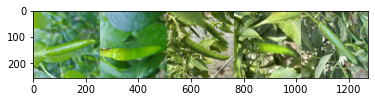

--y value--
[0, 0, 0, 0, 0]


In [81]:
# 5개의 이미지를 수평으로 나란히 출력
import matplotlib.pyplot as plt

print('--x값--')
plt.imshow(np.hstack(X[:5]))
plt.show()

print('--y value--')
print(y[:5])

In [ ]:
# npz load
import numpy as np

data = np.load('data/train_plant.npz')
data

In [ ]:
list(data)

['X', 'Y']

In [ ]:
X = data['X']
X

array([[[[0.61176471, 0.77647059, 0.04705882],
         [0.54509804, 0.70588235, 0.00784314],
         [0.50588235, 0.66666667, 0.01568627],
         ...,
         [0.54901961, 0.61568627, 0.34901961],
         [0.54901961, 0.60784314, 0.3372549 ],
         [0.5372549 , 0.58823529, 0.31372549]],

        [[0.57647059, 0.7254902 , 0.07843137],
         [0.58039216, 0.7254902 , 0.10588235],
         [0.58431373, 0.7372549 , 0.1372549 ],
         ...,
         [0.60392157, 0.65490196, 0.43529412],
         [0.61176471, 0.66666667, 0.43529412],
         [0.61960784, 0.6627451 , 0.42745098]],

        [[0.61176471, 0.73333333, 0.23529412],
         [0.63529412, 0.76078431, 0.2627451 ],
         [0.63529412, 0.77647059, 0.25882353],
         ...,
         [0.70980392, 0.75294118, 0.59607843],
         [0.71372549, 0.75686275, 0.59215686],
         [0.72156863, 0.75686275, 0.58823529]],

        ...,

        [[0.61568627, 0.78039216, 0.38039216],
         [0.62745098, 0.78823529, 0.41176471]

In [ ]:
y = data['Y']
y

array([0, 0, 0, ..., 2, 2, 2])

## CNN

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

## 사용 패키지

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [ ]:
import os
import cv2
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

## 데이터 로드

In [ ]:
PATH = 'data/'
train_npz = np.load(PATH + 'train_plant.npz')
test_npz = np.load(PATH + 'val_plant.npz')
print(list(train_npz))
print(list(test_npz))

['X', 'Y']
['X', 'Y']


In [ ]:
X = train_npz['X']
y = train_npz['Y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = 0.3, random_state = 2021
)

In [ ]:
print(np.shape(X_train), len(y_train))
print(np.shape(X_val), len(y_val))

(1400, 255, 255, 3) 1400
(600, 255, 255, 3) 600


In [ ]:
# y데이터의 분할은 편향없이 잘 되었는가 확인작업

unique, counts = np.unique(y_train, return_counts=True)

unique_yt = dict(zip(unique, counts))
unique_yt

{0: 713, 1: 668, 2: 19}

In [ ]:
# y데이터의 분할은 편향없이 잘 되었는가 확인작업

unique, counts = np.unique(y_val, return_counts=True)

unique_yv = dict(zip(unique, counts))
unique_yv

{0: 287, 1: 305, 2: 8}

# 5. CNN
- 컨볼루션 신경망
- 컴퓨터 비전 (Computer Vision) 에서 사용
- 텍스트, 시계열 데이터 등에서도 성능 좋음
- 오버피팅 회피
    - 규제화 함수
        - 가중치 감쇠 (Weight Decay)
        - 모델 복잡도 제한
        - L1, L2 노름, 엘라스틱 넷 (Elastic Net)
        - 기능에 맞춰 가중치 합 구해 손실 함수에 더함
        - tensorflow.keras.regularizers.l1(l = 0.01) : 가중치 절대값 합 (릿지)
        - tensorflow.keras.regularizers.l2(l = 0.01) : 가중치 제곱값 합 (라쏘)
        - tensorflow.keras.regularizers.l1_l2(l1 = 0.01, l2 = 0.01) : 가중치 절대값 합 (릿지) + 가중치 제곱값 합 (라쏘) = (엘라스틱 넷)
    - 드롭 아웃
        - 학습 진행 중 신경망 일부 유닛 제외
        - 테스트 중 작동 하지 않고 모든 유닛 활성화
        - 출력을 드롭 아웃 비율만큼 제외
        - 드롭 아웃 비율 0.2 ~ 0.5
    - 배치 정규화
        - 드롭 아웃과 비교
        - 내부 공선성 (Internal Covariance Shift) 해결 방법
        - 출력값 범위 제한 -> 불확실성 감소 목적
        - 그래디언트 손실, 폭주 없이 높은 학습률 사용 가능
        - 자체적 규제화 효과 포함
        - Dense or Conv2D -> BatchNormalization() -> Activation()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
model = Sequential()
# (255, 255, 3)
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 input_shape = (255, 255, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 255, 255, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 255, 255, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 255, 255, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0

In [ ]:
model.compile(
    optimizer = Adam(1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    batch_size = 32,
    validation_data = (X_val, y_val)
)

Epoch 1/30
44/44 [==============================] - 28s 295ms/step - loss: 1.3366 - acc: 0.8386 - val_loss: 4.0835 - val_acc: 0.5083
Epoch 2/30
44/44 [==============================] - 11s 250ms/step - loss: 0.9518 - acc: 0.9764 - val_loss: 6.0800 - val_acc: 0.5083
Epoch 3/30
44/44 [==============================] - 11s 245ms/step - loss: 0.9022 - acc: 0.9936 - val_loss: 6.5190 - val_acc: 0.5083
Epoch 4/30
44/44 [==============================] - 11s 253ms/step - loss: 0.8826 - acc: 0.9936 - val_loss: 7.1778 - val_acc: 0.5083
Epoch 5/30
44/44 [==============================] - 11s 252ms/step - loss: 0.8669 - acc: 0.9957 - val_loss: 6.9383 - val_acc: 0.5083
Epoch 6/30
44/44 [==============================] - 11s 252ms/step - loss: 0.8452 - acc: 0.9979 - val_loss: 7.5840 - val_acc: 0.5083
Epoch 7/30
44/44 [==============================] - 11s 249ms/step - loss: 0.8374 - acc: 0.9957 - val_loss: 6.9765 - val_acc: 0.5083
Epoch 8/30
44/44 [==============================] - 11s 252ms/step - 

## 그래프

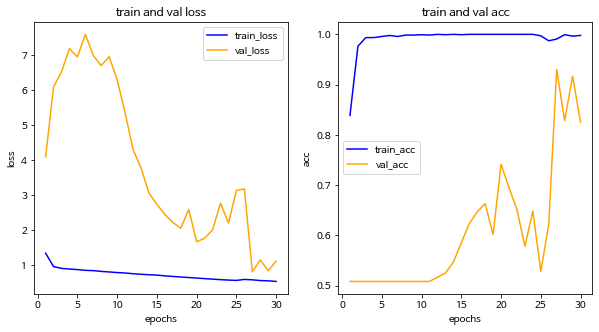

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
# 훈련, 검증 손실
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
acc = his_dict['acc']
val_acc = his_dict['val_acc']
# 훈련, 검증 정확도
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

## h5 저장

In [ ]:
from keras.models import load_model
model.save('pepper.h5')